In [801]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import missingno as msno

In [802]:
df = pd.read_csv(r'C:\Users\benke\Downloads\Salaries.csv')

## Data Investigation | Cleaning

In [803]:
df.shape

(148654, 13)

In [804]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [805]:
df.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [806]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [807]:
# dropping Notes and Id Columns
df.drop(columns = ['Id', 'Notes'], inplace = True)

In [808]:
# checking for result

df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,San Francisco,NaN
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco,NaN
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,San Francisco,NaN
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,San Francisco,NaN
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,San Francisco,NaN


In [809]:
# changing BasePay to appropriate datatype

# checking for unique values
df['BasePay'].unique()

array([167411.18, 155966.02, 212739.13, ..., '6.04', '15.50',
       'Not Provided'], dtype=object)

In [810]:
# Filling Not Provided with 0

df['BasePay'] = df['BasePay'].replace('Not Provided', 0)

In [811]:
# converting BasePay to float from object

df['BasePay'] = df['BasePay'].astype(float)

# check for result
df['BasePay'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 148654 entries, 0 to 148653
Series name: BasePay
Non-Null Count   Dtype  
--------------   -----  
148049 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [812]:
# checking for uniques values

df['OvertimePay'].unique()

array([0.0, 245131.88, 106088.18, ..., '102.70', '56.77', 'Not Provided'],
      dtype=object)

In [813]:
# filling Not Provided with 0

df['OvertimePay'] = df['OvertimePay'].replace('Not Provided', 0)

In [814]:
# converting OvertimePay to float from object

df['OvertimePay'] = df['OvertimePay'].astype(float)

# check for result
df['OvertimePay'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 148654 entries, 0 to 148653
Series name: OvertimePay
Non-Null Count   Dtype  
--------------   -----  
148654 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [815]:
# checking for unique values
df['OtherPay'].unique()

array([400184.25, 137811.38, 16452.6, ..., '13.35', 'Not Provided',
       '-618.13'], dtype=object)

In [816]:
# replacing Not Provided with 0

df['OtherPay'] = df['OtherPay'].replace('Not Provided', 0)

In [817]:
# converting OtherPay to float from object

df['OtherPay'] = df['OtherPay'].astype(float)

# check for result
df['OtherPay'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 148654 entries, 0 to 148653
Series name: OtherPay
Non-Null Count   Dtype  
--------------   -----  
148654 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [818]:
# using abt to remove (-)non-numerical characters from OtherPay
df['OtherPay'] = df['OtherPay'].abs()

In [819]:
# checking unique values for Benefits
df['Benefits'].unique()

array([nan, 44430.12, 69810.19, ..., '0.13', '1.24', 'Not Provided'],
      dtype=object)

In [820]:
# replacing Not Provided with 0
df['Benefits'] = df['Benefits'].replace('Not Provided', 0)

In [821]:
# converting Benefits to float from object

df['Benefits'] = df['Benefits'].astype(float)

# check for result
df['Benefits'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 148654 entries, 0 to 148653
Series name: Benefits
Non-Null Count   Dtype  
--------------   -----  
112495 non-null  float64
dtypes: float64(1)
memory usage: 1.1 MB


In [822]:
# checking unique values for TotalPay
df['TotalPay'].unique()

array([ 5.6759543e+05,  5.3890928e+05,  3.3527991e+05, ...,
        1.2890000e+01,  6.0000000e+00, -6.1813000e+02])

In [823]:
# using abt to remove (-)non-numerical characters from OtherPay
df['TotalPay'] = df['TotalPay'].abs()

In [824]:
# checking unique values for TotalPay
df['TotalPay'].unique()

array([5.6759543e+05, 5.3890928e+05, 3.3527991e+05, ..., 1.3350000e+01,
       1.2890000e+01, 6.0000000e+00])

In [825]:
# checking unique values for TotalPayB
df['TotalPayBenefits'].unique()

array([ 5.6759543e+05,  5.3890928e+05,  3.3527991e+05, ...,
        1.2890000e+01,  7.2400000e+00, -6.1813000e+02])

In [826]:
# using abt to remove (-)non-numerical characters from TotalPayBenefits
df['TotalPayBenefits'] = df['TotalPayBenefits'].abs()

## Handling Missing Values

In [827]:
df.isnull().sum()

EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Agency                   0
Status              110535
dtype: int64

<Axes: >

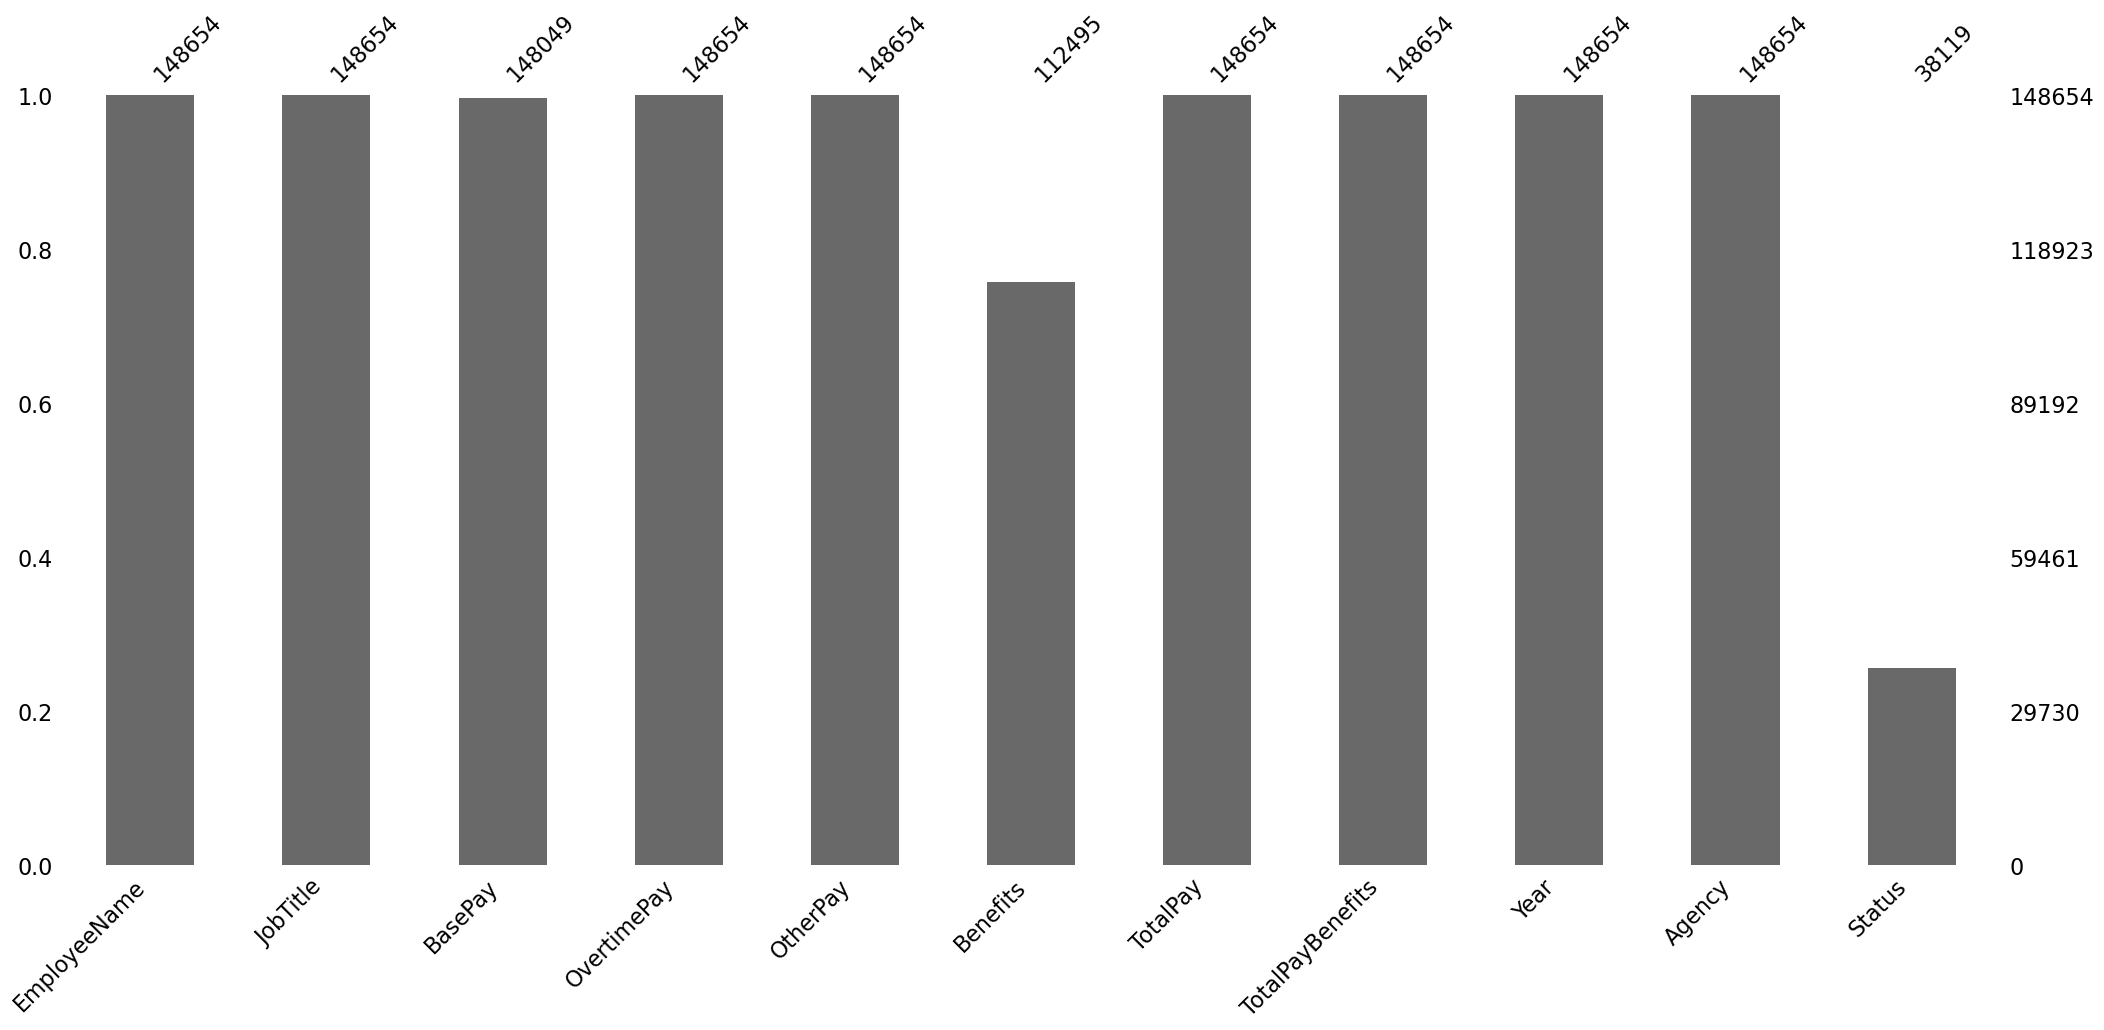

In [828]:
msno.bar(df)

In [829]:
# replacing missing value in BasePay with mean

# calculate mean

basepaymean = df['BasePay'].mean()

# replacing missing values with mean

df['BasePay'] = df['BasePay'].fillna(value = basepaymean) 

# Handling missing values for Benefits by replacing them with 0

df['Benefits'] = df['Benefits'].fillna(value = 0)

# Handling missing value for Status base on the condition that is basepay is above mean value FT, else PT

# Calculate the mean of BasePay
basepaymean = df['BasePay'].mean()

# Replace missing values in Status based on the condition
df['Status'] = np.where(
    df['Status'].isnull(),  # Check for missing values in Status
    np.where(df['BasePay'] > basepaymean, 'FT', 'PT'),  # Condition: BasePay > mean
    df['Status']  # Keep the original Status if not missing
)


In [830]:
# checking results
df.isnull().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
Status              0
dtype: int64

In [831]:
# recheking for datatype appropriateness
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148654 non-null  object 
 1   JobTitle          148654 non-null  object 
 2   BasePay           148654 non-null  float64
 3   OvertimePay       148654 non-null  float64
 4   OtherPay          148654 non-null  float64
 5   Benefits          148654 non-null  float64
 6   TotalPay          148654 non-null  float64
 7   TotalPayBenefits  148654 non-null  float64
 8   Year              148654 non-null  int64  
 9   Agency            148654 non-null  object 
 10  Status            148654 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 12.5+ MB


## Checking for and Handling Outliers

In [832]:
# extracting numerical and categorical columns

cat_cols = df.select_dtypes(include = ['object'])

# checking result

cat_cols.head()

,EmployeeName,JobTitle,Agency,Status
0,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,San Francisco,FT
1,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),San Francisco,FT
2,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),San Francisco,FT
3,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,San Francisco,FT
4,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",San Francisco,FT


In [833]:
# Extarcting numerical columns

num_cols = df.select_dtypes(include = ['float', 'int'])

# checking for result

num_cols.head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011
1,155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
2,212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
3,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
4,134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011


In [834]:
# duplicate num_cols
num_cols2 = num_cols.copy()

# check result
num_cols2

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011
1,155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
2,212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
3,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
4,134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011
...,...,...,...,...,...,...,...
148649,0.00,0.00,0.00,0.0,0.00,0.00,2014
148650,0.00,0.00,0.00,0.0,0.00,0.00,2014
148651,0.00,0.00,0.00,0.0,0.00,0.00,2014
148652,0.00,0.00,0.00,0.0,0.00,0.00,2014


In [835]:
# dropping year from the column num_cols

num_cols.pop('Year')

num_cols

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
0,167411.18,0.00,400184.25,0.0,567595.43,567595.43
1,155966.02,245131.88,137811.38,0.0,538909.28,538909.28
2,212739.13,106088.18,16452.60,0.0,335279.91,335279.91
3,77916.00,56120.71,198306.90,0.0,332343.61,332343.61
4,134401.60,9737.00,182234.59,0.0,326373.19,326373.19
...,...,...,...,...,...,...
148649,0.00,0.00,0.00,0.0,0.00,0.00
148650,0.00,0.00,0.00,0.0,0.00,0.00
148651,0.00,0.00,0.00,0.0,0.00,0.00
148652,0.00,0.00,0.00,0.0,0.00,0.00


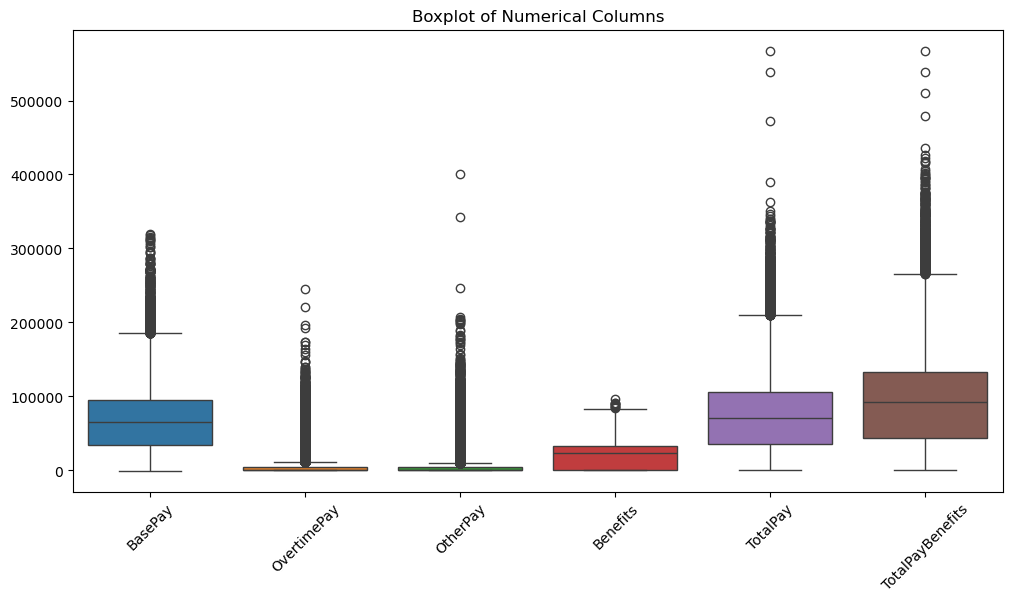

In [836]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_cols)
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [837]:
# handling outlier with IQR

for col in num_cols.columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = num_cols[col].quantile(0.25)
    Q3 = num_cols[col].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers using 1.2 instead of 1.5
    lower_bound = Q1 - 1.2 * IQR
    upper_bound = Q3 + 1.2 * IQR
    
    # Remove outliers by filtering the dataframe
    num_cols = num_cols[(num_cols[col] >= lower_bound) & (num_cols[col] <= upper_bound)]

# num_cols will now contain only rows without outliers using the 1.2 IQR multiplier


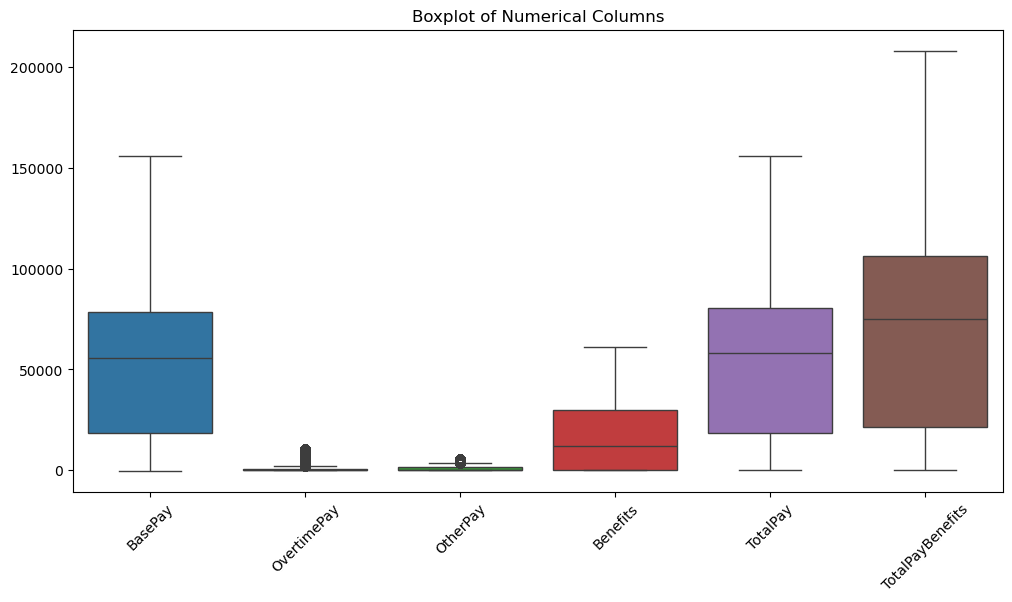

In [838]:
# Checking result

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=num_cols)
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

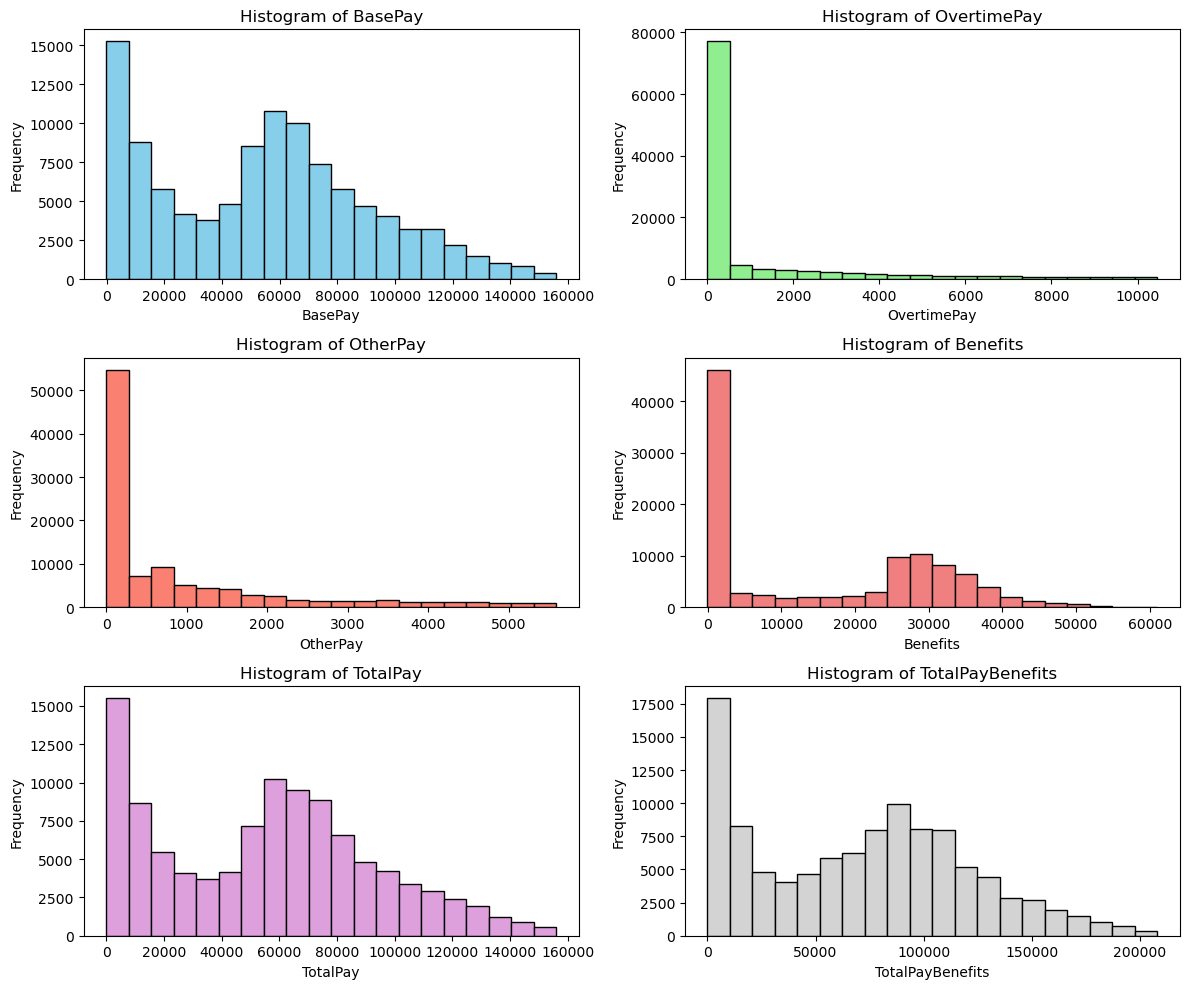

In [839]:
# Set up a 3x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define different colors for each subplot
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'plum', 'lightgray']

# Iterate over each column and its corresponding subplot
for i, col in enumerate(num_cols.columns):
    # Plot the histogram
    axes[i].hist(num_cols[col], bins=20, color=colors[i], edgecolor='black')
    
    # Set title and labels
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


### the above shows a positive skewed data

In [840]:
# Apply Box-Cox transformation
for col in num_cols:
    # Shift data if necessary to make all values positive
    if (df[col] <= 0).any():
        df[col] = df[col] + abs(df[col].min()) + 1  # Shift to make all values positive
    
    # Apply Box-Cox transformation
    df[col], fitted_lambda = stats.boxcox(df[col])
    print(f"Transformed {col} with lambda: {fitted_lambda}")


Transformed BasePay with lambda: 0.6222826772420011
Transformed OvertimePay with lambda: -0.072022732085048
Transformed OtherPay with lambda: 0.11378533169554211
Transformed Benefits with lambda: 0.22074020227344612
Transformed TotalPay with lambda: 0.5660030929697994
Transformed TotalPayBenefits with lambda: 0.5867998664080971


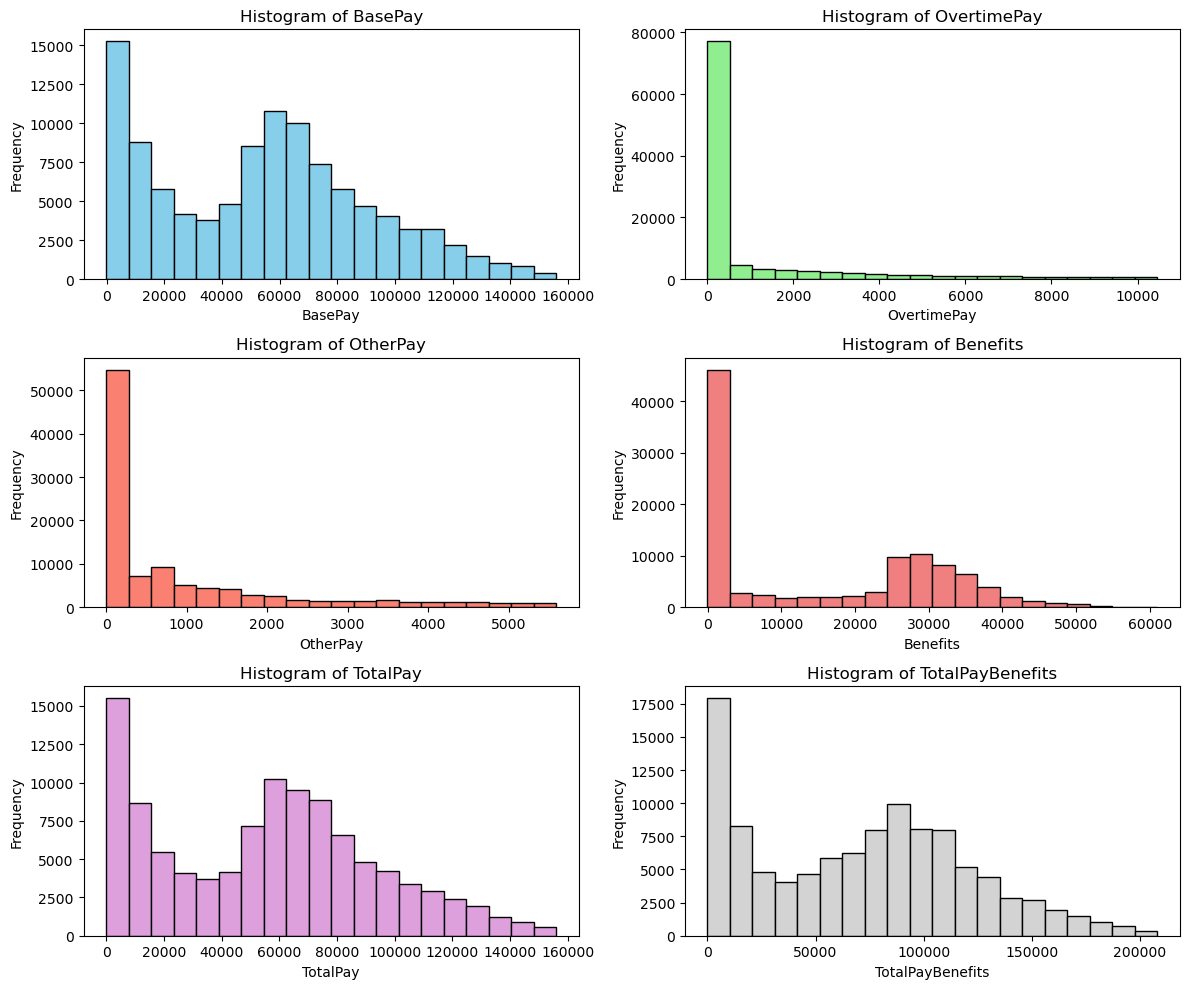

In [841]:
# Set up a 3x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define different colors for each subplot
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'plum', 'lightgray']

# Iterate over each column and its corresponding subplot
for i, col in enumerate(num_cols.columns):
    # Plot the histogram
    axes[i].hist(num_cols[col], bins=20, color=colors[i], edgecolor='black')
    
    # Set title and labels
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


In [842]:
# Apply log transformation to each column in the dataframe num_cols

# Adding a small constant (e.g., 1) to avoid taking log of zero or negative numbers
num_cols_log = num_cols.apply(lambda x: np.log(x + 1))

# Display the transformed dataframe
print(num_cols_log.head())


        BasePay  OvertimePay  OtherPay  Benefits   TotalPay  TotalPayBenefits
1822  11.924719     0.000000  8.517393       0.0  11.957305         11.957305
1823  11.911938     8.194171  8.101029       0.0  11.957296         11.957296
1829  11.956707     0.000000  0.000000       0.0  11.956707         11.956707
1830  11.956707     0.000000  0.000000       0.0  11.956707         11.956707
1850  11.954064     0.000000  0.000000       0.0  11.954064         11.954064


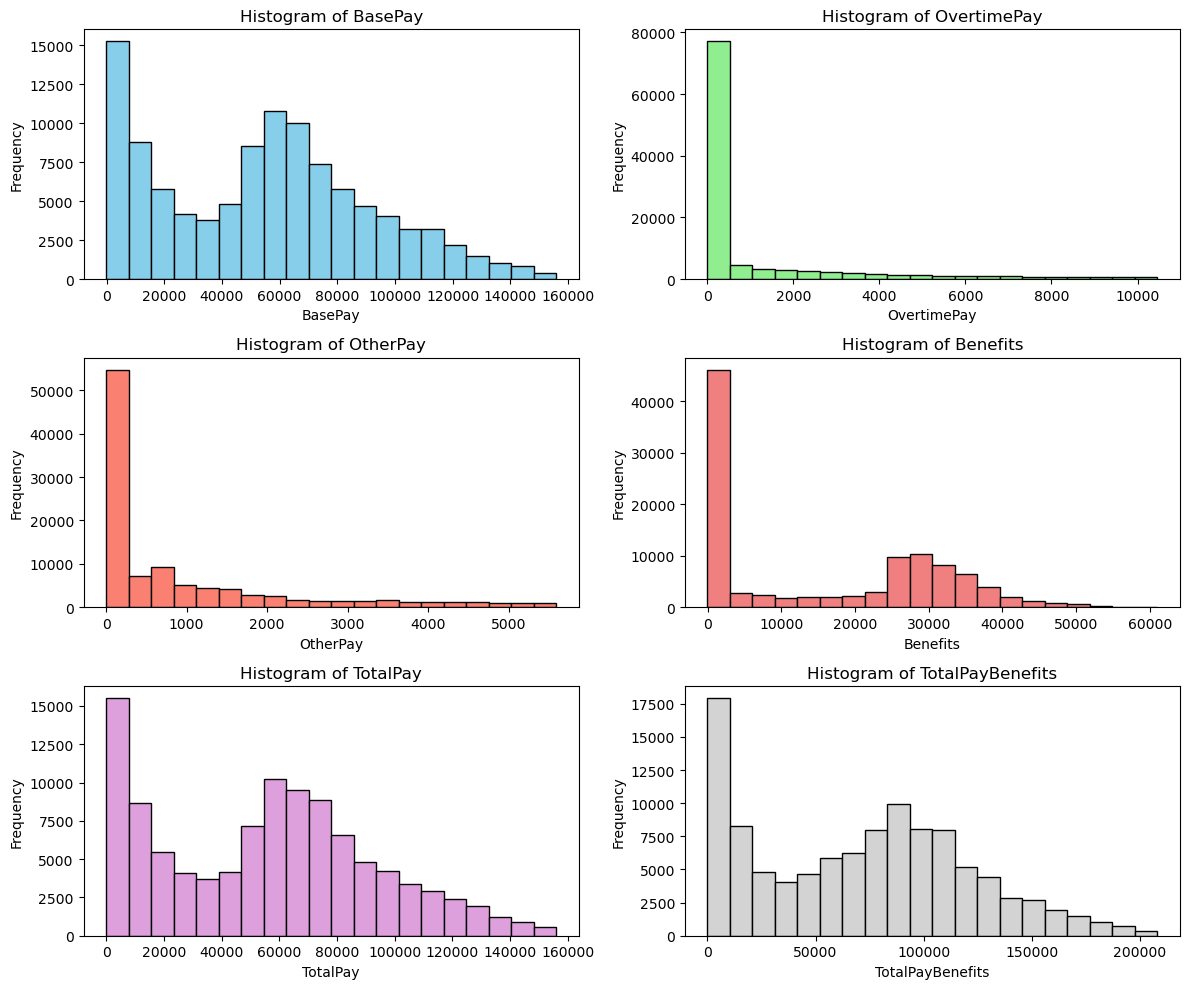

In [843]:
# Set up a 3x2 subplot grid
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define different colors for each subplot
colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'plum', 'lightgray']

# Iterate over each column and its corresponding subplot
for i, col in enumerate(num_cols.columns):
    # Plot the histogram
    axes[i].hist(num_cols[col], bins=20, color=colors[i], edgecolor='black')
    
    # Set title and labels
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


# Exploratory Data Analysis

### univariate Analysis

In [844]:
num_cols.columns

Index(['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'TotalPayBenefits'],
      dtype='object')

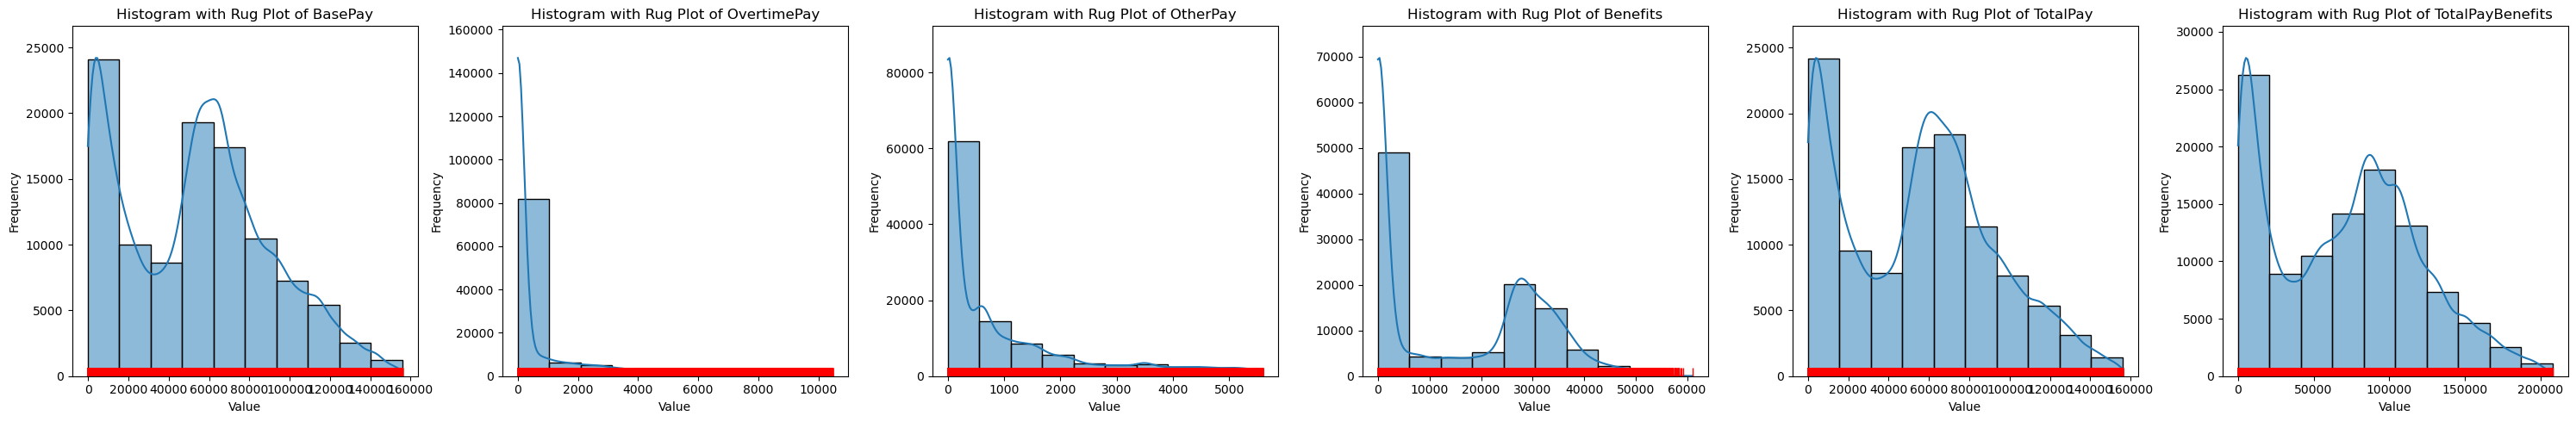

In [845]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming num_cols is your DataFrame
# Create a figure and axes for subplots
num_cols_count = num_cols.shape[1]  # Number of numerical columns
fig, axes = plt.subplots(nrows=1, ncols=num_cols_count, figsize=(5 * num_cols_count, 5))

# Loop through each numerical column and create a histogram with a rug plot
for i, column in enumerate(num_cols.columns):
    sns.histplot(num_cols[column], bins=10, kde=True, ax=axes[i])
    sns.rugplot(num_cols[column], color='r', ax=axes[i])
    axes[i].set_title(f'Histogram with Rug Plot of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


In [846]:
# visualizing categorical columns
cat_cols.columns

Index(['EmployeeName', 'JobTitle', 'Agency', 'Status'], dtype='object')

In [847]:
num_cols.isnull().sum()

BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
dtype: int64

In [848]:
cat_cols.isnull().sum()

EmployeeName    0
JobTitle        0
Agency          0
Status          0
dtype: int64

## Bivariate Analysis

In [849]:
print(num_cols.shape)
print(cat_cols.shape)

(106385, 6)
(148654, 4)


## when .concat was used to join the cat and num dataframe for bivariate and multivariate analysis, it led to missing values in the new
dataframe. so .join was used instead which eliminated the null values

In [850]:
# Example: Joining using the index
df1 = num_cols.join(cat_cols, how='inner')  # how can be 'left', 'right', 'outer'

df1.head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,EmployeeName,JobTitle,Agency,Status
1822,150951.20,0.00,5000.00,0.0,155951.20,155951.20,MARGE VIZCARRA,MANAGER VI,San Francisco,FT
1823,149034.25,3618.79,3296.86,0.0,155949.90,155949.90,ERIC VINTERO,LIEUTENANT III (POLICE DEPARTMENT),San Francisco,FT
1829,155858.06,0.00,0.00,0.0,155858.06,155858.06,ANDREW YICK,ATTORNEY (CIVIL/CRIMINAL),San Francisco,FT
1830,155858.06,0.00,0.00,0.0,155858.06,155858.06,MICHAEL BERG,ATTORNEY (CIVIL/CRIMINAL),San Francisco,FT
1850,155446.62,0.00,0.00,0.0,155446.62,155446.62,CHRISTOPHER HITE,ATTORNEY (CIVIL/CRIMINAL),San Francisco,FT


In [851]:
df1.isnull().sum()

BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
EmployeeName        0
JobTitle            0
Agency              0
Status              0
dtype: int64

In [852]:
df1 = df1.assign(Year=num_cols2['Year'])

In [853]:
df1.head()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,EmployeeName,JobTitle,Agency,Status,Year
1822,150951.20,0.00,5000.00,0.0,155951.20,155951.20,MARGE VIZCARRA,MANAGER VI,San Francisco,FT,2011
1823,149034.25,3618.79,3296.86,0.0,155949.90,155949.90,ERIC VINTERO,LIEUTENANT III (POLICE DEPARTMENT),San Francisco,FT,2011
1829,155858.06,0.00,0.00,0.0,155858.06,155858.06,ANDREW YICK,ATTORNEY (CIVIL/CRIMINAL),San Francisco,FT,2011
1830,155858.06,0.00,0.00,0.0,155858.06,155858.06,MICHAEL BERG,ATTORNEY (CIVIL/CRIMINAL),San Francisco,FT,2011
1850,155446.62,0.00,0.00,0.0,155446.62,155446.62,CHRISTOPHER HITE,ATTORNEY (CIVIL/CRIMINAL),San Francisco,FT,2011


In [854]:
df1.isnull().sum()

BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
EmployeeName        0
JobTitle            0
Agency              0
Status              0
Year                0
dtype: int64

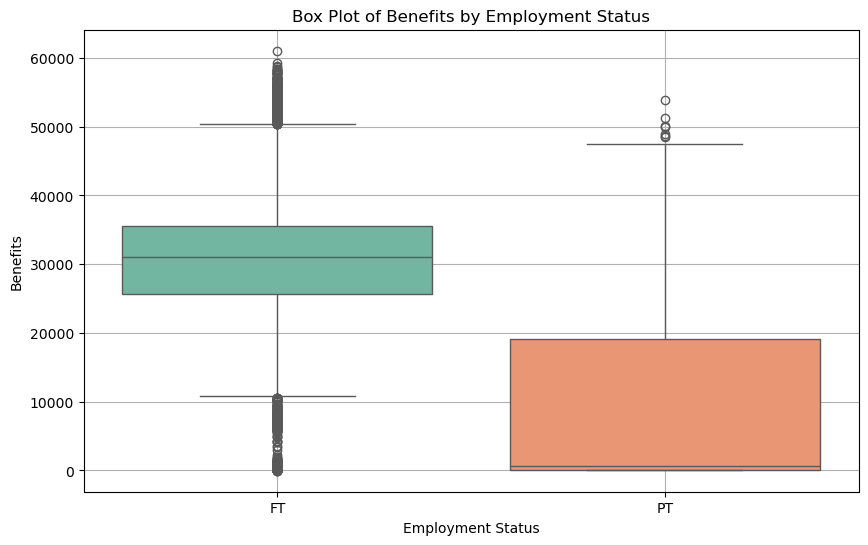

In [855]:
# status vs Benefits

# Box plot to compare Benefits received by different employment statuses
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Status', y='Benefits', palette='Set2')
plt.title('Box Plot of Benefits by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Benefits')
plt.grid(True)
plt.show()


In [856]:
# Calculate and compare the mean Benefits between different statuses
mean_benefits = df1.groupby('Status')['Benefits'].mean().reset_index()
mean_benefits.columns = ['Status', 'Mean Benefits']

print(mean_benefits)

  Status  Mean Benefits
0     FT   26385.504491
1     PT    8591.386150


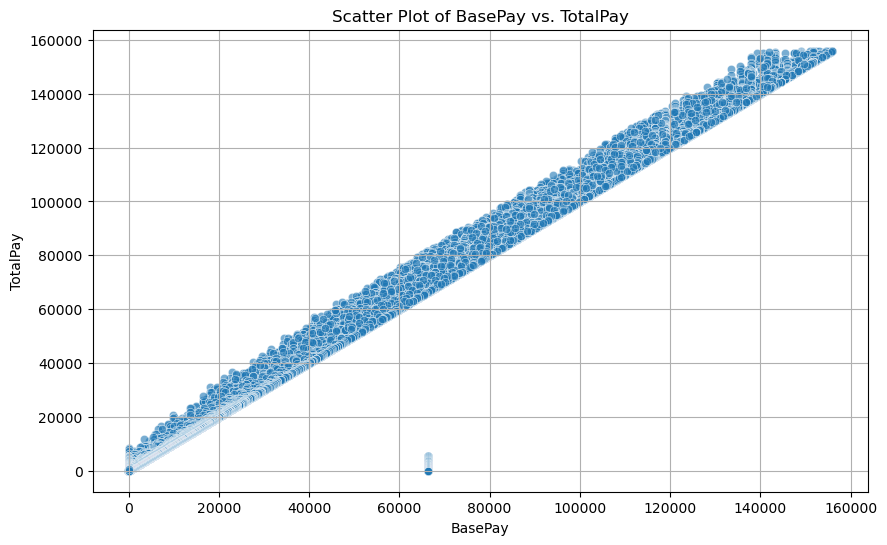

In [857]:
# Assuming df1 is your DataFrame containing the columns 'BasePay' and 'TotalPay'

# Create a scatter plot to visualize the relationship between BasePay and TotalPay
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='BasePay', y='TotalPay', alpha=0.6)
plt.title('Scatter Plot of BasePay vs. TotalPay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.grid(True)
plt.show()

In [858]:

# Calculate the correlation coefficient
correlation_coefficient = df1['BasePay'].corr(df1['TotalPay'])
print(f'Correlation Coefficient between BasePay and TotalPay: {correlation_coefficient:.3f}')


Correlation Coefficient between BasePay and TotalPay: 0.990


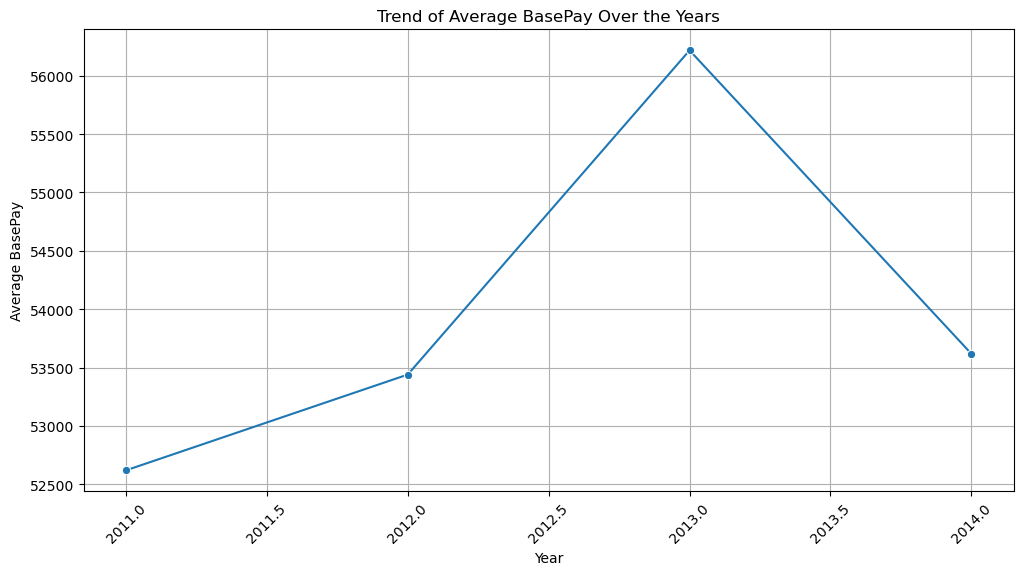

   Year  Average BasePay
0  2011     52618.697696
1  2012     53439.323330
2  2013     56217.596842
3  2014     53617.670692


In [859]:
# Calculate the average BasePay for each year
average_basepay_by_year = df1.groupby('Year')['BasePay'].mean().reset_index()
average_basepay_by_year.columns = ['Year', 'Average BasePay']

# Create a line graph to show the trend of average BasePay over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_basepay_by_year, x='Year', y='Average BasePay', marker='o')
plt.title('Trend of Average BasePay Over the Years')
plt.xlabel('Year')
plt.ylabel('Average BasePay')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate year labels for better readability
plt.show()

# Investigate the trend
print(average_basepay_by_year)

### Explanation of Average BasePay Over the Years

The table below shows the average BasePay for each year from 2011 to 2014:

| Year | Average BasePay |
|------|------------------|
| 2011 | 52,618.70        |
| 2012 | 53,439.32        |
| 2013 | 56,217.60        |
| 2014 | 53,617.67        |

1. **2011**: The average BasePay in 2011 was approximately **$52,618.70**. This figure serves as the baseline for comparison in the subsequent years.

2. **2012**: In 2012, the average BasePay slightly increased to **$53,439.32**, indicating a modest upward trend. This suggests a positive adjustment in salaries, potentially due to inflation, market demand, or other economic factors.

3. **2013**: The most significant increase occurred in 2013, where the average BasePay rose to **$56,217.60**. This jump represents a considerable growth of approximately **5.3%** compared to the previous year. Such an increase could be attributed to various factors, including company performance, labor market conditions, or changes in industry standards that necessitated higher compensation.

4. **2014**: However, in 2014, the average BasePay decreased to **$53,617.67**, a decline from the previous year. This reduction of about **4.6%** compared to 2013 may suggest a market correction, budget constraints, or other external factors affecting compensation strategies.

### Summary

Overall, while there was a noticeable upward trend in average BasePay from 2011 to 2013, the decline in 2014 raises questions about the stability of salaries during this period. Understanding these fluctuations can help stakeholders make informed decisions regarding salary benchmarks, hiring practices, and financial planning in the organization. Further analysis may be warranted to explore the underlying causes of these changes and the implications for employee compensation moving forward.

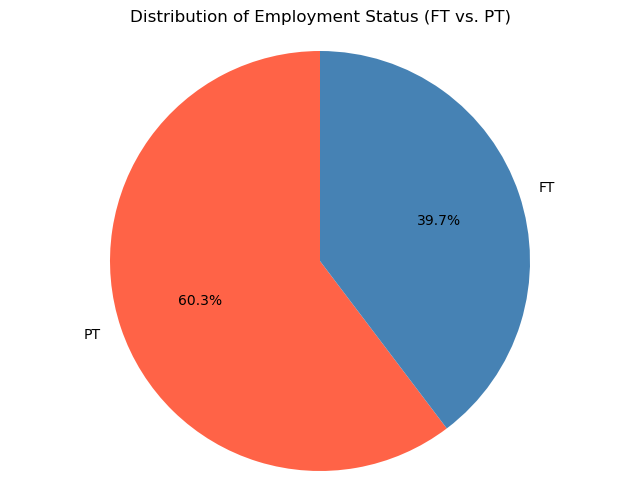

In [860]:
# Assuming df1 is your DataFrame containing the 'Status' column

# Calculate the distribution of employment statuses
status_counts = df1['Status'].value_counts()

# Create a pie chart with contrasting colors
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF6347', '#4682B4'])  # Tomato and Steel Blue
plt.title('Distribution of Employment Status (FT vs. PT)')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


- ### Explanation of Pie Chart Distribution for Employment Status

The pie chart shows the distribution of employment statuses—Full-Time (FT) and Part-Time (PT)—with the following percentages:

- **Part-Time (PT)**: **60.3%**
- **Full-Time (FT)**: **39.7%**

#### Context of Missing Values Imputation

1. **Imputation Method**:
   - Missing values in the `Status` column were filled based on the condition that if an employee's `BasePay` is above the mean BasePay, they are classified as Full-Time (FT); if it is below, they are classified as Part-Time (PT).

2. **Mean BasePay Calculation**:
   - The mean BasePay represents the average salary across all employees in your dataset. This average serves as a threshold for categorizing employment status.

#### Interpretation of the Distribution

1. **Higher Percentage of PT**:
   - The fact that **60.3%** of the employees are classified as Part-Time indicates that a significant portion of the workforce earns below the average salary threshold. This could reflect the nature of the organization, where part-time roles are more common, or it could suggest that a larger segment of employees is in lower-paying positions.

2. **Implications for Workforce Composition**:
   - The higher proportion of Part-Time employees could suggest a workforce structure that leans towards flexible work arrangements, possibly to accommodate varying workloads or operational needs. This can also indicate potential differences in employee benefits and work hours compared to Full-Time employees.

3. **Economic Factors**:
   - This distribution might also reflect broader economic conditions. For instance, in certain industries, it is common to have a larger pool of part-time workers due to shifts in labor demand, seasonal work, or company policies favoring part-time employment.

4. **Consideration of the Imputation Method**:
   - While the imputation method is logical, it's essential to consider its limitations. Classifying employees solely based on their BasePay relative to the mean may not capture the entire picture of employment status. Other factors such as job roles, hours worked, and company policies can also influence whether an employee is FT or PT.

### Conclusion

The pie chart distribution highlights a workforce with a predominance of Part-Time employees, likely driven by the method used to fill in missing values. Understanding this distribution can help inform workforce management strategies, hiring practices, and employee engagement initiatives within the organization. Further analysis could explore the characteristics and needs of both Full-Time and Part-Time employees to ensure effective support and resource allocation.

## Multivariate Analysis

In [861]:
df1.columns

Index(['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay',
       'TotalPayBenefits', 'EmployeeName', 'JobTitle', 'Agency', 'Status',
       'Year'],
      dtype='object')

In [862]:
# Sort the DataFrame by BasePay in descending order
top_5_employees = df1.sort_values(by='BasePay', ascending=False).head(5)

# Select only the EmployeeName and BasePay columns
top_5_employees = top_5_employees[['EmployeeName', 'BasePay']]

# Display the result
print(top_5_employees)


       EmployeeName    BasePay
75802  Dana  Nelson  155936.00
75393    Diane  Lim  155934.26
1829    ANDREW YICK  155858.06
1830   MICHAEL BERG  155858.06
38070  Ramon Garcia  155818.52


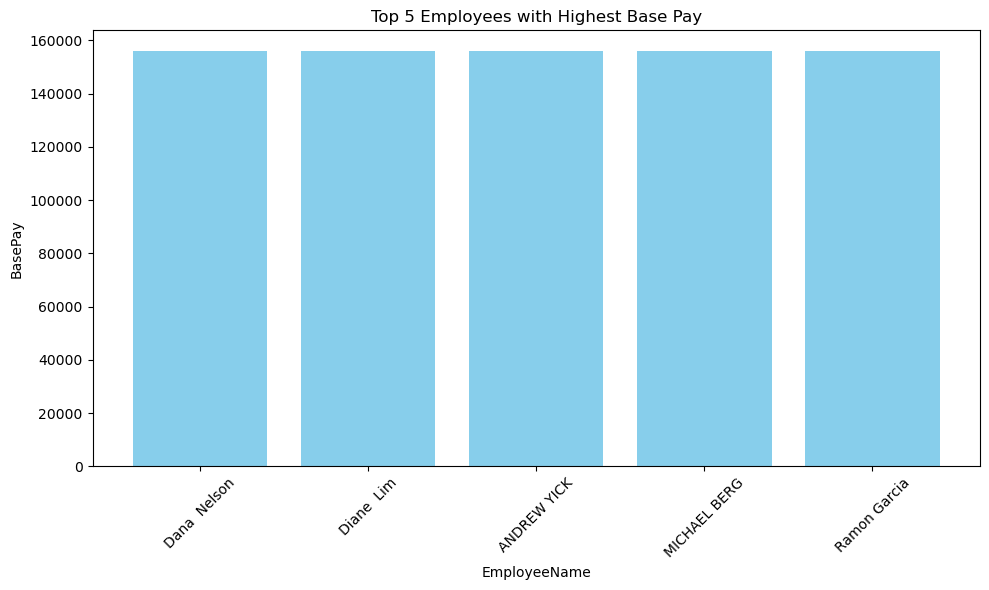

In [863]:
# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_5_employees['EmployeeName'], top_5_employees['BasePay'], color='skyblue')

# Add labels and title
plt.xlabel('EmployeeName')
plt.ylabel('BasePay')
plt.title('Top 5 Employees with Highest Base Pay')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

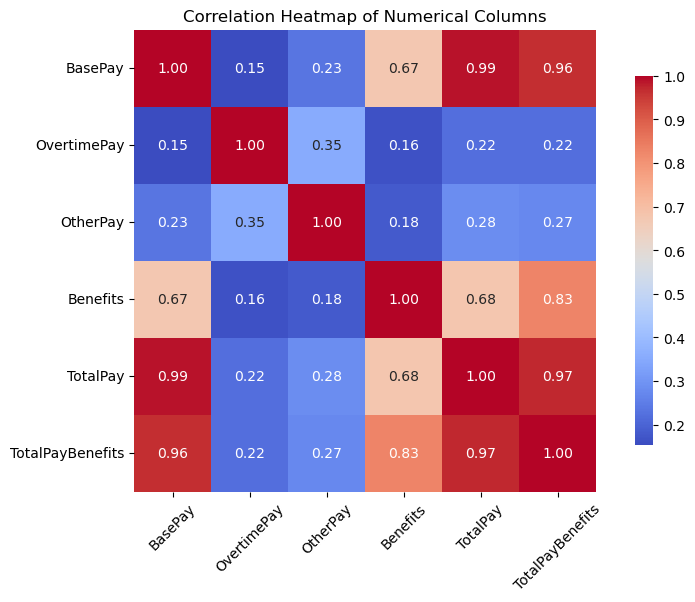

In [864]:
# Calculate the correlation matrix
correlation_matrix = df1[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Columns')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [865]:
# Select independent variables and dependent variable
import statsmodels.api as sm

X = df1[['BasePay', 'OvertimePay', 'Benefits']]  # Add more variables as needed
y = df1['TotalPay']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the multiple regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               TotalPay   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                 2.246e+06
Date:                Fri, 25 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:57:34   Log-Likelihood:            -1.0513e+06
No. Observations:              106385   AIC:                         2.103e+06
Df Residuals:                  106381   BIC:                         2.103e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         137.9770     25.930      5.321      

In [866]:
# Convert 'Year' to datetime format if it's not already
df1['Year'] = pd.to_datetime(df1['Year'], format='%Y')

# Set 'Year' as the index
df1.set_index('Year', inplace=True)

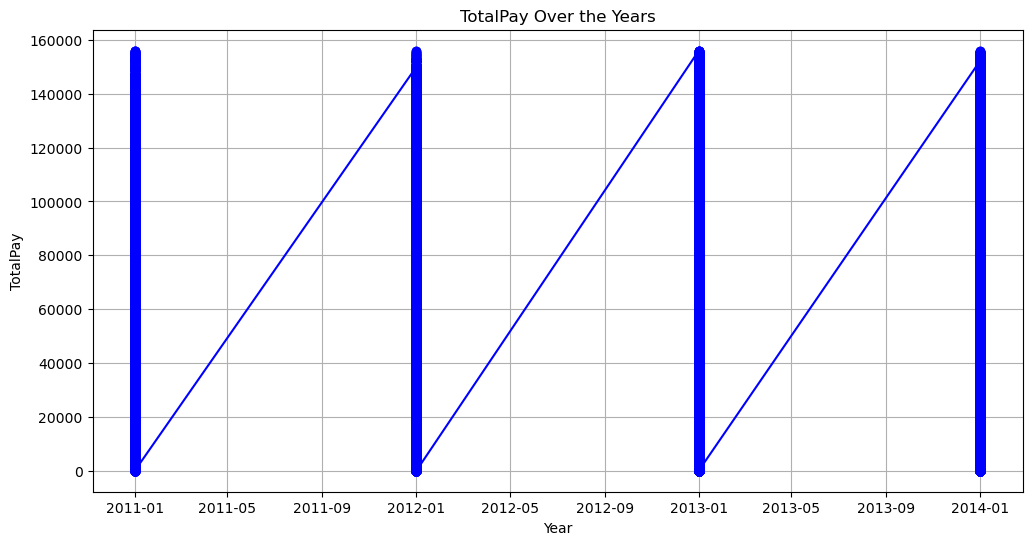

In [867]:
# Plot TotalPay over the years
plt.figure(figsize=(12, 6))
plt.plot(df1['TotalPay'], marker='o', linestyle='-', color='b')
plt.title('TotalPay Over the Years')
plt.xlabel('Year')
plt.ylabel('TotalPay')
plt.grid()
plt.show()


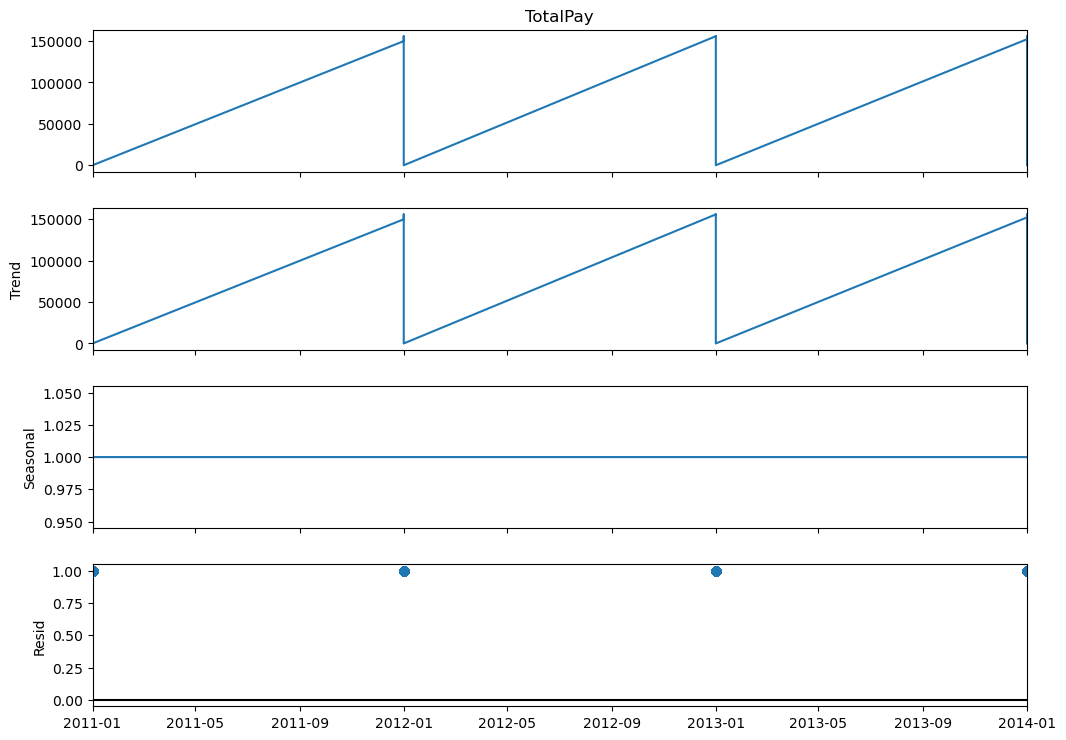

In [868]:
df1_filtered = df1[df1['TotalPay'] > 0]

# Decompose the time series with the multiplicative model
decomposition = seasonal_decompose(df1_filtered['TotalPay'], model='multiplicative', period=1)
result = decomposition.plot()
result.set_size_inches(12, 8)
plt.show()
